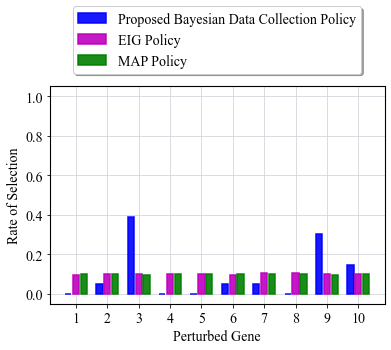

In [1]:
import gym
import pygame
import pickle
import matplotlib.pyplot as plt
import numpy as np
from enum import IntEnum
import dill
from statistics import variance, mean, stdev

from matplotlib import pyplot as plt

import dill

import random

from itertools import product

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable


from sklearn.preprocessing import MinMaxScaler

from collections import defaultdict

# with open('4Gene2UnknownWithQsTestOnRealEnv_1.pkl','rb') as f:  # Python 3: open(..., 'wb')
#     max_pis_ours, max_pis_random = pickle.load(f)
#
# with open('4Gene2UnknownWithQsTestOnRealEnvNoPerturbData_1.pkl','rb') as f:  # Python 3: open(..., 'wb')
#     max_pis_NoPerturb = pickle.load(f)

with open('stat_of_actions_AllOnes_Until20_ver2_BetterPerformance.pkl','rb') as f:  # Python 3: open(..., 'wb')
    stat_of_actions = pickle.load(f)

with open('stat_of_actions_Until20_ver2_AL.pkl','rb') as f:  # Python 3: open(..., 'wb')
    stat_of_actions_AL = pickle.load(f)
    
with open('stat_of_actions_Until20_ver2_MAP.pkl','rb') as f:  # Python 3: open(..., 'wb')
    stat_of_actions_MAP = pickle.load(f)
    
# print(stat_of_actions/np.sum(stat_of_actions))

action_percent =stat_of_actions/np.sum(stat_of_actions)
action_percent_AL =stat_of_actions_AL/np.sum(stat_of_actions_AL)
action_percent_MAP =stat_of_actions_MAP/np.sum(stat_of_actions_MAP)


font = {'size': 14}
plt.rc('font', **font)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = '#d3d3db'
plt.rcParams['axes.linewidth'] = 1.1

Model_Num = 10

materials = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# CTEs = [CError_mean[101], CError_mean2[101], CError_mean3[101], CError_mean4[101]]
# error = [CError_std[101], CError_std2[101], CError_std3[101], CError_std4[101]]

x_pos = list((np.arange(0, 4*(Model_Num), 4))+1)
x_pos_AL = list((np.arange(0, 4*(Model_Num), 4))+2)
x_pos_MAP = list((np.arange(0, 4*(Model_Num), 4))+3)

horizon = 50 + 1
trials = 1000
    
# x_pos = np.arange(1, 11)

fig, ax = plt.subplots()

time_step = 15

ax.bar(x_pos, action_percent, alpha=0.9, color='blue', edgecolor='blue', linewidth=1.6, label='Proposed Bayesian Data Collection Policy') #label='Proposed Method Mean')  # , yerr=error) #, align='center', ecolor='#a80505', capsize=10, capstyle='round') #alpha=0.5
ax.bar(x_pos_AL, action_percent_AL, alpha=0.9, color='m', edgecolor='m', linewidth=1.6, label='EIG Policy') #label='Proposed Method Mean')  # , yerr=error) #, align='center', ecolor='#a80505', capsize=10, capstyle='round') #alpha=0.5
ax.bar(x_pos_MAP, action_percent_MAP, alpha=0.9, color='green', edgecolor='green', linewidth=1.6, label='MAP Policy') #label='Proposed Method Mean')  # , yerr=error) #, align='center', ecolor='#a80505', capsize=10, capstyle='round') #alpha=0.5

ax.set_ylabel('Rate of Selection')

ax.set_xlabel('Perturbed Gene')
ax.set_xticks((np.arange(1, 4*(Model_Num)+1, 4))+1)
ax.set_xticklabels(materials)


ax.set_ylim(-0.05, 1.05)

# plt.legend(loc='upper right')
plt.legend(loc='upper center', bbox_to_anchor=(0.50, +1.4), fancybox=True, shadow=True, ncol=1)

ax.set_axisbelow(True)

# plt.tight_layout()
# plt.savefig("6.png", dpi=300)#, bbox_inches = "tight")

plt.savefig("DistributionofActions_AllOnes_Final_1.png", dpi=300, bbox_inches = "tight")

plt.show()
